   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...
5      1  FreeMsg Hey there darling it's been 3 week's n...
6      0  Even my brother is not like to speak with me. ...
7      0  As per your request 'Melle Melle (Oru Minnamin...
8      1  WINNER!! As a valued network customer you have...
9      1  Had your mobile 11 months or more? U R entitle...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB
None
label
0    0.865937
1    0.134063


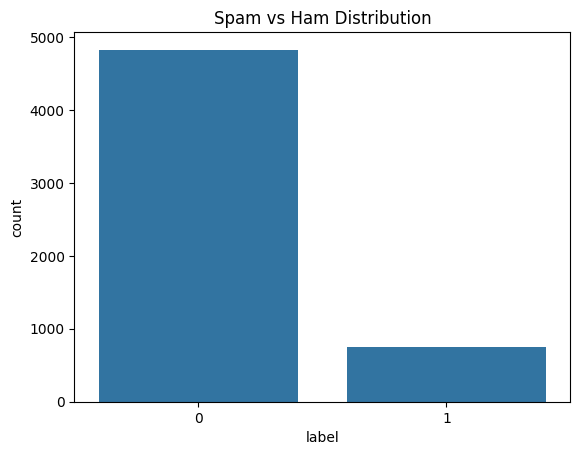

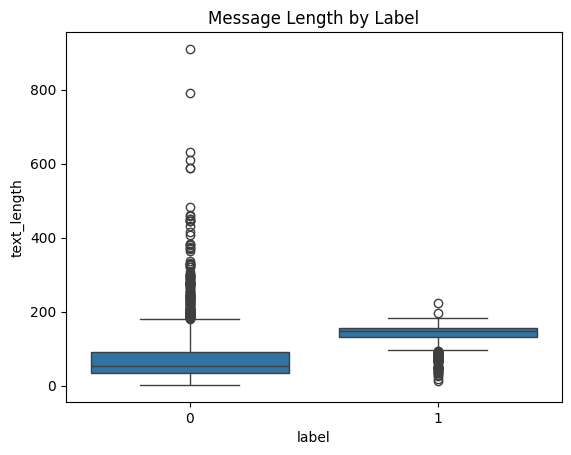

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Optional: pip install seaborn for better visuals

# Load with encoding fix
try:
    df = pd.read_csv('../data/spam.csv', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv('../data/spam.csv', encoding='latin-1')

# Clean columns (dataset has extras sometimes)
df = df[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'text'})
df['label'] = df['label'].map({'ham': 0, 'spam': 1})  # Binary: 0=ham, 1=spam

# Stats
print(df.head(10))  # View samples
print(df.info())    # Check types/nulls
print(df['label'].value_counts(normalize=True))  # ~87% ham, 13% spam
print(df['text'].apply(len).describe())  # Length stats

# Visualize imbalance and lengths
sns.countplot(x='label', data=df)
plt.title('Spam vs Ham Distribution')
plt.show()

df['text_length'] = df['text'].apply(len)
sns.boxplot(x='label', y='text_length', data=df)
plt.title('Message Length by Label')
plt.show()